In [2]:
import molmap
import numpy as np
import pandas as pd
# from sklearn.metrics.pairwise import cosinae_similarity
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt 
import os

In [3]:
print(molmap.__version__)

1.3.6


In [4]:
os.chdir("/data/home/lmx/psy_test/v1_20241016/data/")

In [5]:
position = np.load('Feature_position.npy', allow_pickle=True)

In [6]:
position = position.flatten()

In [7]:
fmap_shape = (7,7)
m,n = fmap_shape

### Convert data (FEP data)

In [7]:
data_FEP = pd.read_csv('data_FEP.csv', index_col='Unnamed: 0')
data_FEP = data_FEP.iloc[: , 0:54]

In [8]:
data_FEP

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO,...,PDW,PLT,RBC,RDW-CV,WBC,ID,Gender,Age,dig,Chap
6094,0.821281,0.327054,0.196210,0.174940,0.021034,0.420871,0.192734,0.270855,0.000000,0.232154,...,0.753865,0.448106,0.000000,0.317145,0.529684,670640,M,34,N,11
14843,0.612310,0.659405,0.163508,0.069976,0.568788,0.267837,0.128489,0.438619,0.593831,0.343140,...,0.324592,0.704090,0.361121,0.571614,0.270194,678765,F,25,N,19
979,0.515862,0.734452,0.348817,0.097966,0.527292,0.594309,0.128489,0.312796,0.730223,0.662225,...,0.627608,0.398239,0.688001,0.335322,0.294413,672194,M,49,N,2
699,0.805206,0.841662,0.196210,0.020993,0.601985,0.522893,0.139197,1.000000,0.440390,0.923506,...,0.185710,0.321776,0.428174,0.371674,0.267599,655366,F,49,N,2
2117,0.515862,0.369938,0.408770,0.125957,0.195319,0.125005,0.214149,0.438619,0.303999,0.000000,...,0.564480,0.421510,0.507798,1.000000,0.268464,685700,M,33,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0.491750,0.648684,0.348817,0.222524,0.543890,0.431073,0.256979,0.291826,0.303999,0.359326,...,0.274089,0.524569,0.407220,0.462556,0.458757,196932,F,54,P,p5
1776,0.331004,0.552195,0.288864,0.181938,0.610285,0.400466,0.256979,0.365222,0.883663,0.417131,...,0.147833,0.644249,0.725718,0.607966,0.649915,139555,M,47,P,p8
2749,0.652497,0.536114,0.299765,0.153947,0.535591,0.349455,0.214149,0.354737,0.474488,0.234466,...,0.173084,0.318452,0.377884,0.280793,0.384369,365555,F,25,P,p4
2916,0.572124,0.680847,0.310666,0.072075,0.900761,0.533095,0.171319,0.585412,0.457439,0.794022,...,0.627608,0.617654,0.604186,0.426203,0.769280,253467,F,60,P,p4


In [9]:
# data_FEP.iloc[0:1,]
data_feature_FEP = data_FEP.iloc[:, 0:49]

In [10]:
data_feature_FEP

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO,...,MCV,MON%,MPV,NEU%,PCT,PDW,PLT,RBC,RDW-CV,WBC
6094,0.821281,0.327054,0.196210,0.174940,0.021034,0.420871,0.192734,0.270855,0.000000,0.232154,...,0.749596,0.584302,0.811611,0.370888,0.569835,0.753865,0.448106,0.000000,0.317145,0.529684
14843,0.612310,0.659405,0.163508,0.069976,0.568788,0.267837,0.128489,0.438619,0.593831,0.343140,...,0.589637,0.542039,0.397146,0.306970,0.676893,0.324592,0.704090,0.361121,0.571614,0.270194
979,0.515862,0.734452,0.348817,0.097966,0.527292,0.594309,0.128489,0.312796,0.730223,0.662225,...,0.405069,0.584302,0.656187,0.567052,0.427091,0.627608,0.398239,0.688001,0.335322,0.294413
699,0.805206,0.841662,0.196210,0.020993,0.601985,0.522893,0.139197,1.000000,0.440390,0.923506,...,0.601941,0.394120,0.241722,0.437011,0.248662,0.185710,0.321776,0.428174,0.371674,0.267599
2117,0.515862,0.369938,0.408770,0.125957,0.195319,0.125005,0.214149,0.438619,0.303999,0.000000,...,0.093355,0.774484,0.656187,0.192357,0.462777,0.564480,0.421510,0.507798,1.000000,0.268464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0.491750,0.648684,0.348817,0.222524,0.543890,0.431073,0.256979,0.291826,0.303999,0.359326,...,0.569129,0.330726,0.215818,0.395133,0.427091,0.274089,0.524569,0.407220,0.462556,0.458757
1776,0.331004,0.552195,0.288864,0.181938,0.610285,0.400466,0.256979,0.365222,0.883663,0.417131,...,0.597840,0.546266,0.008586,0.429076,0.462777,0.147833,0.644249,0.725718,0.607966,0.649915
2749,0.652497,0.536114,0.299765,0.153947,0.535591,0.349455,0.214149,0.354737,0.474488,0.234466,...,0.515810,0.415251,0.267626,0.406154,0.248662,0.173084,0.318452,0.377884,0.280793,0.384369
2916,0.572124,0.680847,0.310666,0.072075,0.900761,0.533095,0.171319,0.585412,0.457439,0.794022,...,0.683972,0.246200,0.526666,0.749991,0.641207,0.627608,0.617654,0.604186,0.426203,0.769280


In [11]:
a1 = np.array(data_feature_FEP.columns)

In [12]:
col_asses = np.array([np.where(position== item)[0][0] for item in a1])

In [13]:
col_asses

array([35, 42, 39, 40, 47, 27, 33, 38, 43, 41, 32, 25, 44, 30,  8,  9, 31,
       36, 10, 48,  0, 29, 26, 34, 12, 37, 46,  1, 20, 28, 15, 23, 11, 22,
       14,  7, 45,  3,  2,  4, 18, 17,  6, 13, 16, 19, 21, 24,  5])

In [14]:
nrow = data_feature_FEP.index.size
x_FEP = []

for i in range(nrow):
    rec = np.array(data_feature_FEP.iloc[i,:])
    empty = np.zeros(fmap_shape, dtype='O').reshape(m*n,)
    empty[col_asses] = rec
    rec = empty.reshape(7,7)
    x_FEP.append(rec)

x_FEP = np.array(x_FEP)

In [15]:
x_FEP.shape

(2000, 7, 7)

In [16]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y_FEP = np.array(data_FEP['dig'])
y_FEP[y_FEP == 'N'] = 0
y_FEP[y_FEP == 'P'] = 1
y_FEP = to_categorical(y_FEP, num_classes)

In [17]:
y_FEP.shape

(2000, 2)

In [18]:
np.unique(y_FEP, axis=0, return_counts=True)

(array([[0., 1.],
        [1., 0.]], dtype=float32),
 array([1000, 1000]))

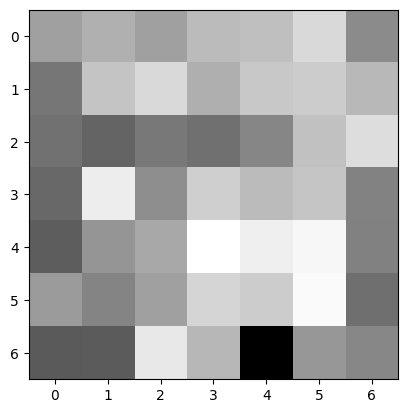

In [19]:
b = np.around(x_FEP[2].astype('float32'),4)
plt.imshow(b, cmap="Greys")

In [20]:
np.save('x_FEP.npy', x_FEP)    # .npy extension is added if not given
np.save('y_FEP.npy', y_FEP)  
# d = np.load('x_FEP.npy',allow_pickle=True)
# d[0] == x_FEP[0]
# # x_train == d
# d.shape

### Convert data (data with outliers & NA [corrected])

In [21]:
data_outlier = pd.read_csv('data_outliers.csv', index_col='Unnamed: 0')

In [22]:
data_outlier

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO,...,PDW,PLT,RBC,RDW-CV,WBC,ID,Gender,Age,dig,Chap
1,0.049698,0.000000,1.000000,0.202930,0.000000,0.441275,0.417590,0.569684,0.000000,0.190534,...,1.000000,0.000000,0.574851,0.771553,1.000000,676712,M,82,N,1
2,0.700721,0.214484,1.000000,1.000000,0.000000,0.696332,1.000000,0.145033,0.235803,0.225217,...,1.000000,0.079090,0.608377,0.953317,0.249434,665618,M,26,N,1
3,0.162220,0.369938,1.000000,0.433851,0.095728,0.431073,0.910133,0.606382,0.269901,0.172036,...,0.690736,0.285207,0.591614,0.517085,0.878266,676149,M,4,N,1
4,0.314929,0.337775,1.000000,0.979664,0.195319,0.257634,0.717399,0.166003,0.321048,0.058738,...,0.412972,0.763930,0.616758,0.607966,1.000000,678452,M,2,N,1
5,0.403340,0.225205,1.000000,0.216926,0.203619,0.369859,0.321223,0.391435,0.372194,0.135041,...,0.072079,0.594382,0.495226,0.589790,1.000000,680654,M,4,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,0.957915,0.932790,0.343367,0.223923,0.734774,0.053589,0.513957,0.648323,0.662027,0.000000,...,0.008951,1.000000,0.503607,0.898788,0.662889,246973,M,52,P,p2
3044,0.226519,0.546835,1.000000,0.234420,0.535591,0.247432,1.000000,1.000000,0.866614,0.410194,...,0.122581,0.487999,0.608377,0.480732,0.599746,563565,M,56,P,p2
3045,0.499788,0.889906,0.457823,0.377870,0.684979,0.716736,0.364053,0.234157,0.440390,0.687660,...,0.135207,0.471377,0.859823,0.498909,0.363610,387493,M,20,P,p4
3046,0.604273,0.584358,0.376069,0.139952,0.552190,0.512691,0.374761,0.737447,0.679076,0.424068,...,0.930624,0.478026,0.851442,0.335322,1.000000,32147,M,24,P,p3


In [23]:
# data_outlier.iloc[0:1,]
data_feature_outlier = data_outlier.iloc[:, 0:49]

In [24]:
data_feature_outlier

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO,...,MCV,MON%,MPV,NEU%,PCT,PDW,PLT,RBC,RDW-CV,WBC
1,0.049698,0.000000,1.000000,0.202930,0.000000,0.441275,0.417590,0.569684,0.000000,0.190534,...,0.355851,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.574851,0.771553,1.000000
2,0.700721,0.214484,1.000000,1.000000,0.000000,0.696332,1.000000,0.145033,0.235803,0.225217,...,0.462490,0.785050,1.000000,0.194561,0.212976,1.000000,0.079090,0.608377,0.953317,0.249434
3,0.162220,0.369938,1.000000,0.433851,0.095728,0.431073,0.910133,0.606382,0.269901,0.172036,...,0.076949,1.000000,0.656187,0.000000,0.320033,0.690736,0.285207,0.591614,0.517085,0.878266
4,0.314929,0.337775,1.000000,0.979664,0.195319,0.257634,0.717399,0.166003,0.321048,0.058738,...,0.158979,0.753353,0.448954,0.000000,0.783951,0.412972,0.763930,0.616758,0.607966,1.000000
5,0.403340,0.225205,1.000000,0.216926,0.203619,0.369859,0.321223,0.391435,0.372194,0.135041,...,0.241009,1.000000,0.086298,0.000000,0.462777,0.072079,0.594382,0.495226,0.589790,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,0.957915,0.932790,0.343367,0.223923,0.734774,0.053589,0.513957,0.648323,0.662027,0.000000,...,0.712682,0.383554,0.000000,0.551623,0.962380,0.008951,1.000000,0.503607,0.898788,0.662889
3044,0.226519,0.546835,1.000000,0.234420,0.535591,0.247432,1.000000,1.000000,0.866614,0.410194,...,0.897250,0.457514,0.060394,0.783052,0.355719,0.122581,0.487999,0.608377,0.480732,0.599746
3045,0.499788,0.889906,0.457823,0.377870,0.684979,0.716736,0.364053,0.234157,0.440390,0.687660,...,0.421475,0.563171,0.034490,0.302562,0.320033,0.135207,0.471377,0.859823,0.498909,0.363610
3046,0.604273,0.584358,0.376069,0.139952,0.552190,0.512691,0.374761,0.737447,0.679076,0.424068,...,0.536317,0.425817,0.863419,0.992661,0.605521,0.930624,0.478026,0.851442,0.335322,1.000000


In [25]:
nrow = data_feature_outlier.index.size
x_outlier = []

for i in range(nrow):
    rec = np.array(data_feature_outlier.iloc[i,:])
    empty = np.zeros(fmap_shape, dtype='O').reshape(m*n,)
    empty[col_asses] = rec
    rec = empty.reshape(7,7)
    x_outlier.append(rec)

x_outlier = np.array(x_outlier)

from tensorflow.keras.utils import to_categorical
num_classes = 2
y_outlier = np.array(data_outlier['dig'])
y_outlier[y_outlier == 'N'] = 0
y_outlier[y_outlier == 'P'] = 1
y_outlier = to_categorical(y_outlier, num_classes)

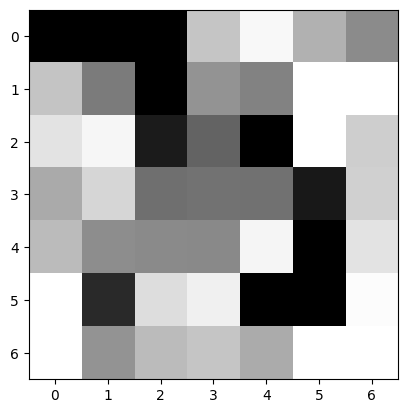

In [26]:
b = np.around(x_outlier[10].astype('float32'),4)
plt.imshow(b, cmap="Greys")

np.save('x_outlier.npy', x_outlier)    # .npy extension is added if not given
np.save('y_outlier.npy', y_outlier)  
# d = np.load('data_intermediate/x_outlier.npy',allow_pickle=True)
# d[0] == x_outlier[0]
# # x_train == d
# d.shape

In [27]:
np.unique(y_outlier, axis=0, return_counts=True)

(array([[0., 1.],
        [1., 0.]], dtype=float32),
 array([ 762, 2285]))

## NAs

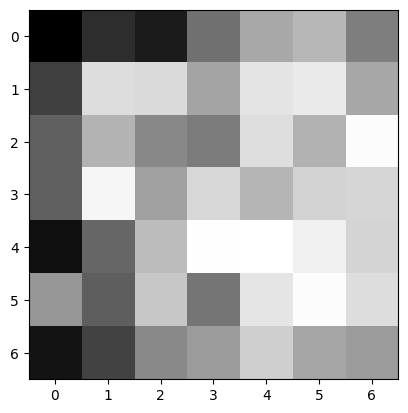

In [28]:
data_incomplete = pd.read_csv('data_NA.csv', index_col='Unnamed: 0')

# data_incomplete.iloc[0:1,]
data_feature_incomplete = data_incomplete.iloc[:, 0:49]

nrow = data_feature_incomplete.index.size
x_incomplete = []

for i in range(nrow):
    rec = np.array(data_feature_incomplete.iloc[i,:])
    empty = np.zeros(fmap_shape, dtype='O').reshape(m*n,)
    empty[col_asses] = rec
    rec = empty.reshape(7,7)
    x_incomplete.append(rec)

x_incomplete = np.array(x_incomplete)

from tensorflow.keras.utils import to_categorical
num_classes = 2
y_incomplete = np.array(data_incomplete['dig'])
y_incomplete[y_incomplete == 'N'] = 0
y_incomplete[y_incomplete == 'P'] = 1
y_incomplete = to_categorical(y_incomplete, num_classes)

y_incomplete

b = np.around(x_incomplete[4].astype('float32'),4)
plt.imshow(b,cmap="Greys")

np.save('x_incomplete.npy', x_incomplete)    # .npy extension is added if not given
np.save('y_incomplete.npy', y_incomplete)  
# d = np.load('x_incomplete.npy',allow_pickle=True)
# d[0] == x_incomplete[0]
# # x_train == d
# d.shape

In [29]:
np.unique(y_incomplete, axis=0, return_counts=True)

(array([[0., 1.],
        [1., 0.]], dtype=float32),
 array([3348, 2293]))